정답없는경우 데이터로드 - > 전처리 ->  EDA -> 차원축소(PCA) -> 클러스터링 수 결정 ->모델학습 -> 평가

예측 정밀도를 평가할수없음 타겟없이 데이터만으로

In [64]:
from sklearn.datasets import load_wine
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
wine = load_wine()

In [22]:
df_wine = pd.DataFrame(data=wine.data , columns=wine.feature_names)
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [11]:
train , test = train_test_split(df_wine , train_size=0.7 , random_state=0)

In [15]:
train.describe()
#alcohol malic_acid 평균값의 스케일이다름 -> 최소최대값도 차이가 큼 스케일링 해줘야함
# 이상치가 없다면 정규화하기
# 이상치 확인 -> pairplot

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,12.983065,2.383710,2.363145,19.525806,100.088710,2.258387,1.969516,0.364274,1.612500,4.999919,0.955855,2.601935,746.766129
std,0.801340,1.136696,0.276377,3.579569,14.659281,0.600198,0.977046,0.124235,0.598242,2.351321,0.235548,0.722256,308.858167
min,11.030000,0.890000,1.360000,10.600000,70.000000,1.100000,0.470000,0.140000,0.420000,1.280000,0.540000,1.270000,312.000000
25%,12.362500,1.607500,2.225000,17.075000,89.000000,1.735000,1.072500,0.270000,1.247500,3.050000,0.780000,1.905000,510.000000
50%,13.040000,1.885000,2.360000,19.450000,98.000000,2.200000,2.065000,0.340000,1.555000,4.550000,0.960000,2.780000,667.500000
75%,13.640000,3.247500,2.565000,21.700000,106.250000,2.705000,2.767500,0.450000,1.952500,6.375000,1.120000,3.170000,986.250000
max,14.750000,5.650000,3.220000,30.000000,162.000000,3.880000,3.740000,0.660000,3.580000,11.750000,1.710000,4.000000,1547.000000


In [32]:
import seaborn as sns
# sns.pairplot(train)
# y값 폭이 크다? => 이상치(돌출값)이 있따 현재는업슴

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
ms = MinMaxScaler().fit(train)

In [20]:
train_ms = pd.DataFrame(ms.transform(train) , columns=train.columns)

In [38]:
sns.pairplot(train_ms)

차원축소(PCA) : 특징량(X) -> 줄이기 

시각화가 쉬워짐 , 클러스터링이 쉽다

In [24]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2)
pca.fit(train_ms)

PCA(n_components=2)

In [29]:
train_2d = pd.DataFrame(pca.transform(train_ms) , columns=['pca_1' , 'pca_2'])
train_2d[:3]

,pca_1,pca_2
0,0.660647,0.001073
1,0.034471,0.488179
2,-0.691630,-0.598746


In [37]:
sns.scatterplot(x='pca_1' , y='pca_2' , data = train_2d)

<AxesSubplot:xlabel='proline', ylabel='Count'>

In [39]:
from sklearn.cluster import KMeans

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


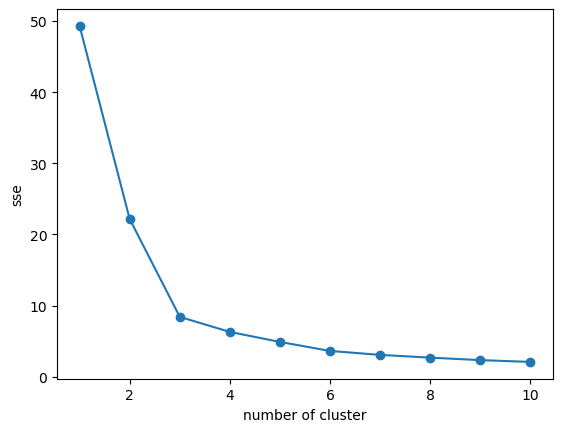

In [41]:
import matplotlib.pyplot as plt
lst_sse = []

for i in range(1,11) :
    km = KMeans(n_clusters=i , random_state=0)
    km.fit(train_2d)
    lst_sse.append(km.inertia_) # 클러스터 內 분산, 값이 적을수록 좋다
    
plt.plot(range(1,11) ,lst_sse, marker = 'o')
plt.xlabel('number of cluster')
plt.ylabel('sse')
plt.show()

In [42]:
km = KMeans(n_clusters=3 , random_state=0).fit(train_2d)

In [43]:
pred_km = km.predict(train_2d)

In [44]:
train_2d['label'] = pred_km

In [46]:
train_2d

,pca_1,pca_2,label
0,0.660647,0.001073,0
1,0.034471,0.488179,1
2,-0.691630,-0.598746,2
3,-0.641773,-0.154483,2
4,0.458963,0.264534,1
...,...,...,...
119,-0.135170,0.506161,1
120,0.139744,0.429037,1
121,0.007530,0.497177,1
122,0.717056,-0.223658,0


In [68]:
sns.scatterplot(x='pca_1' , y='pca_2' , hue='label' ,data=train_2d , palette='Set1')

<AxesSubplot:xlabel='proline', ylabel='Density'>

In [60]:
train['label'] = pred_km

In [61]:
sns.pairplot(train , hue='label',palette='Set1')